In [92]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from itertools import groupby

In [2]:
df = pd.read_pickle("../data/connected_sources/2016")

In [3]:
df.head()

,#DBpURL,ID,WikiURL,birthDate,deathDate,first_name,full_name,gender,name,nationality,...,party,entered,efficiency,eig_central,id,in_degree,k_core,out_degree,name_u,views
0,http://dbpedia.org/resource/Nizamettin_Erkmen,144,http://en.wikipedia.org/wiki/Nizamettin_Erkmen,None,1990-10-24 00:00:00,nizamettin,Nizamettin+Erkmen,male,[ erkmen nizamettin ],[turkish],...,[],2007,0.760000,0.000046,144,2,4,3,Nizamettin_Erkmen,916.0
1,http://dbpedia.org/resource/Claudio_Scajola,183,http://en.wikipedia.org/wiki/Claudio_Scajola,1948-01-15 00:00:00,None,claudio,Claudio+Scajola,male,[ claudio scajola ],[italian],...,[ forza italia (2013) ],2005,0.899654,0.000801,183,9,10,8,Claudio_Scajola,4100.0
2,http://dbpedia.org/resource/Thomas_Clausen_(Lo...,246,http://en.wikipedia.org/wiki/Thomas_Clausen_(L...,1939-12-22 00:00:00,2002-02-20 00:00:00,thomas,Thomas+Clausen+(Louisiana),male,"[ thomas greenwood clausen , clausen thomas g...",[american],...,[ democratic party (united states) ],2013,0.734694,0.000040,246,2,7,5,Thomas_Clausen_(Louisiana),1651.0
3,http://dbpedia.org/resource/Yang_Ti-liang,248,http://en.wikipedia.org/wiki/Yang_Ti-liang,1929-06-30 00:00:00,None,yang,Yang+Ti-liang,male,[ ti-liang yang ],[],...,[],2007,1.000000,0.000007,248,2,5,4,Yang_Ti-liang,6671.0
4,http://dbpedia.org/resource/Mohammad_Natsir,259,http://en.wikipedia.org/wiki/Mohammad_Natsir,1908-07-17 00:00:00,1993-03-14 00:00:00,mohammad,Mohammad+Natsir,male,"[ mohammad natsir , natsir mohammad ]",[indonesian],...,[ masyumi party ],2007,0.814815,0.000068,259,4,4,5,Mohammad_Natsir,7825.0


In [4]:
def drop_columns(df, lst):
    """ Removes dataframe columns specified in lst
    """
    df = df.drop(lst, axis=1)
    return df 

In [5]:
# def get_age(x, thres=110):
#     """ Calculates age of politicians, if birth unknown age is by default=0
#     """
#     birth = x["birthDate"]
#     death = x["deathDate"]
#     if birth == None:
#         return 0 # we don't know age of birt
#     if death == None:
#         delta = datetime.now() - birth
#         age = int(delta.days/365)
#         if age < thres and age > 17.5:
#             return age
#         return -1 # we are not sure when and if the person died 
#     elif death != None and birth!= None:
#         delta = death - birth
#         if death < birth:
# #             age = abs(int(delta.days/365))
# #             if age < thres:
# #                 return age
# #             else:
#             return -1 # we are not sure when and if the person died
#         age = abs(int(delta.days/365))
#         if age < thres and age > 17.5:
#             return int(delta.days/365)
#         else:
#             return -1

In [6]:
def get_age(x, thres=110):
    """ Calculates age of politicians, if birth unknown age is by default=0
    """
    birth = x["birthDate"]
    death = x["deathDate"]
    
    if birth == None and death == None:
        return 0
    if birth != None and death == None:
        delta = datetime.now() - birth
        age = int(delta.days/365)
        if age < 18:
            return 0
        if age < thres:
            return age
        else:
            return 0
    if birth != None and death != None:
        # it might happen that death is before birth.. 
        delta = death - birth
        if death < birth:
            return -1
        else: 
            age = abs(int(delta.days/365))    
            if age < thres and age >= 18:
                return int(delta.days/365)
            else:
                return 0
    if birth == None and death != None:
        return 0 

In [7]:
def is_alive(x, thres=110):
    """ Returns yes / no / unknown depending on if the politician is alive/dead
    """
    birth = x["birthDate"]
    death = x["deathDate"]
    age = x["age"]
    
    if birth != None and death != None:
        if age != -1:
            return "no"
        else:
            return "unknown"        
    if birth == None and death != None:
        return "no"
    if birth != None and death == None:
        if age > 0:
            return "yes"
        elif age == 0 and int((datetime.now() - birth).days/365) < thres:
            return "unknown"
        elif age == 0 and int((datetime.now() - birth).days/365) >= thres:
            return "no"
    if birth == None and death == None:
        return "unknown"
#     if birth != None and death != None:
#         if age != -1:
#             return "no"
#         else:
#             return "unknown"
#     if age == -1 and int((datetime.now() - birth).days/365) < 110:
#         return "unknown"
#     elif age == -1 and int((datetime.now() - birth).days/365) > 110:
#         return "no"
#     elif death != None:
#         return "no"
#     elif death == None and birth == None:
#         return "unknown"
#     elif age > 0:
#         return "yes"
        
        

In [8]:
def add_age(df):
    """ Adds age column to dataframe
    """
    df["age"] = df.apply(lambda x: get_age(x), axis=1)
    return df

In [9]:
def add_alive_status(df):
    df["is_alive"] = df.apply(lambda x: is_alive(x), axis=1)
    return df

In [10]:
def age_distance(date):
    """ Calculates distance from given date to present, if the distance is negative
    it results as a default value -1 
    """
#     print(date)
    if date == None:
        return -1
    else:
        delta = datetime.now() - date
        distance = int(delta.days/365)
        if distance > 0:
            return int(delta.days/365)
        else:
            return -1

In [11]:
def add_distance(df):
    """ Adds 2 columns ["distance_birth"] and ["distance_death"] 
    """
#     if birth_death == "birth":
    df["distance_birth"] = df.apply(lambda x: age_distance(x["birthDate"]),axis=1)
#     elif birth_death == "death":
    df["distance_death"] = df.apply(lambda x: age_distance(x["deathDate"]),axis=1)
    return df

In [12]:
def delta_birth_death(x):
    birth = x["distance_birth"]
    death = x["distance_death"]
    return birth - death

In [13]:
def add_delta(df):
    df["distance_delta"] = df.apply(lambda x: delta_birth_death(x), axis=1)
    return df

# Remove redundant columns

In [14]:
df.columns

Index(['#DBpURL', 'ID', 'WikiURL', 'birthDate', 'deathDate', 'first_name',
       'full_name', 'gender', 'name', 'nationality', 'occupation', 'party',
       'entered', 'efficiency', 'eig_central', 'id', 'in_degree', 'k_core',
       'out_degree', 'name_u', 'views'],
      dtype='object')

In [15]:
df = drop_columns(df, ["first_name", "full_name","name", "id"])

In [16]:
df = add_age(df)
# df["age"].describe()

In [17]:
df = add_alive_status(df)
# df["is_alive"].value_counts()

In [18]:
df = add_distance(df)

In [19]:
df = add_delta(df)

In [20]:
df.columns

Index(['#DBpURL', 'ID', 'WikiURL', 'birthDate', 'deathDate', 'gender',
       'nationality', 'occupation', 'party', 'entered', 'efficiency',
       'eig_central', 'in_degree', 'k_core', 'out_degree', 'name_u', 'views',
       'age', 'is_alive', 'distance_birth', 'distance_death',
       'distance_delta'],
      dtype='object')

In [22]:
df = drop_columns(df, ['#DBpURL', 'ID', 'WikiURL', 'birthDate', 'deathDate',"name_u"])

In [23]:
df.columns

Index(['gender', 'nationality', 'occupation', 'party', 'entered', 'efficiency',
       'eig_central', 'in_degree', 'k_core', 'out_degree', 'views', 'age',
       'is_alive', 'distance_birth', 'distance_death', 'distance_delta'],
      dtype='object')

In [101]:
def get_bar_categorical(column_name, title="Politician nationality values distribution"):
    num = sorted([len(i) for i in df[column_name].values.flatten()])
    num = [len(list(group)) for key, group in groupby(num)]
    print(num)
    label = range(0, len(num))
    plt.bar(label, num)
    plt.xlabel("Number of nationalities")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

[15996, 27057, 2082, 138, 9, 3, 1]


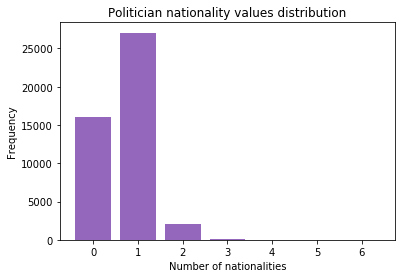

In [103]:
get_bar_categorical("nationality")

[20699, 21575, 2035, 653, 213, 72, 23, 11, 5]


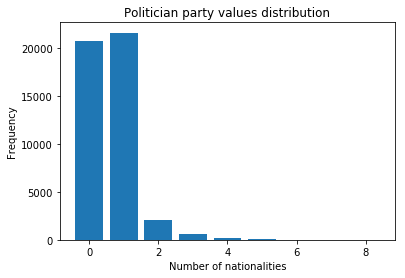

In [104]:
get_bar_categorical("party", title="Politician party values distribution")

In [88]:
num_nationalities = sorted([len(i) for i in df.party.values.flatten()])
num_nationalities[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# df[(df["is_alive"] == "no")]["distance_delta"].describe()

In [ ]:
# df["age"].describe()

In [ ]:
# datetime.now() - datetime(1,1,1,1,0,0)

In [ ]:
### TODO: Prepare categorical data 
# categorical variables handling
# 

In [50]:
["nationality"]

['nationality']

In [63]:
df["nationality"][500:]

500                 [indian]
501                       []
502             [ecuadorian]
503              [filipinos]
504               [american]
505               [american]
506              [malaysian]
507             [australian]
508                [italian]
509              [icelandic]
510                       []
511                       []
512                [british]
513                       []
514                [spanish]
515               [macanese]
516             [australian]
517                 [german]
518                 [indian]
519                [belgian]
520               [american]
521                       []
522                       []
523                 [indian]
524                 [polish]
525                       []
526               [american]
527                       []
528             [australian]
529                       []
               ...          
570                       []
571                [italian]
572                 [indian]
573           